In [13]:
# initialisation
import numpy as np
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('default')
plt.rcParams['text.usetex'] = True                # paramètres latex
plt.rcParams['text.latex.preamble'] = '\\usepackage{libertine}'
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman",
    "font.size": 12
})

# Solveur des l'équation différentielle de la courbe de remous

Supposons que l'on veuille étudier la courbe de remous dans un canal avec les caractéristiques suivantes : pente $i=0{,}1$ % ; longueur $L=10$ km ; débit par unité de largeur $q=10$  $\mathrm{m}^2\cdot\mathrm{s}^{-1}$. La condition aux limites est $h_0=4$ m. Le régime est probablement subcritique, donc la condition aux limites doit être fixée à l'aval.

L'équation de la courbe de remous est ici l'équation de Bresse, une équation différentielle non linéaire du premier ordre en $h$ :
$$
\frac{\mathrm{d} h}{\mathrm{d} x}=\frac{j-i}{\mathrm{Fr}^2-1}=\frac{N(h)}{D(h)}=i\frac{ (h_n/h)^{10/3}-1}{ (h_c/h)^3-1}
$$
avec :
* $j$ : pente de frottement
* $i$ : pente du fond
* $\mathrm{Fr}$ : nombre de Froude
* $h_n$ : hauteur normale
* $h_c$ : hauteur critique

Avec Python, on se sert de la commande *odeint* de la librairie scipy.

In [3]:
# paramètres généraux
# gravité
g = 9.81
# débit par unité de largeur
q = 10
# Manning--Strickler
K = 40

# paramètres du bief
i = 0.001
h0 = 4
L = 10000

## calcul des conditions hydrauliques dans le bief
hn = (q / K / np.sqrt(i)) ** (3/5)
Frn = q / hn ** 1.5 / np.sqrt(g)
hc = (q ** 2 / 9.81) ** (1 / 3)
Fr = q / h0 ** 1.5 / np.sqrt(g)

print("Hauteur normale :",f"{hn:.3} m")
print("Hauteur critique :",f"{hc:.3} m")
print("Froude à l'entrée :",f"{Fr:.2}")
print("Froude asymptotique :",f"{Frn:.2}")

Hauteur normale : 3.46 m
Hauteur critique : 2.17 m
Froude à l'entrée : 0.4
Froude asymptotique : 0.5


On prend garde qu'on intègre de la droite vers la gauche, et il faut donc générer une grille allant dans le sens inverse au sens usuel.

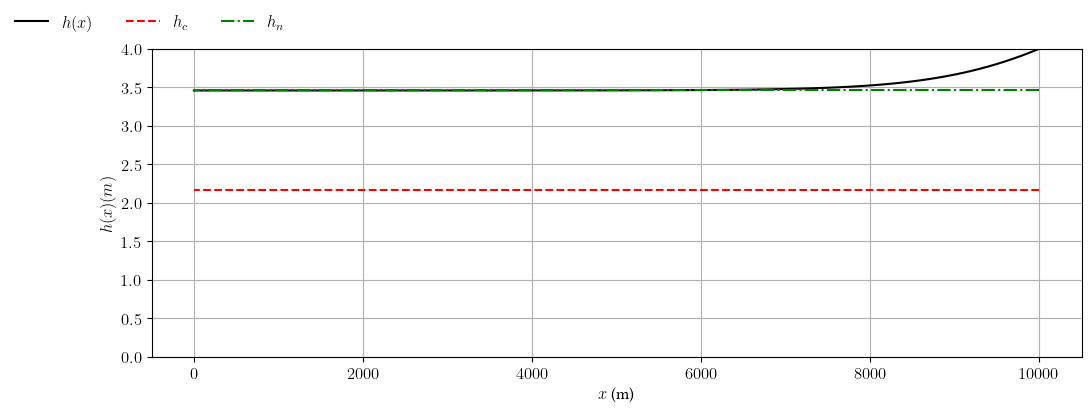

In [16]:
# définition de la fonction de Bresse
def bresse(h,x, slope, hn, hc):
    dhdx = slope * (1 - (hn / h) ** (10./3.)) / (1 - (hc / h) ** 3.)
    return dhdx

# grille
x = np.linspace(10000,0,100)

#solution
sol = odeint(bresse,h0,x,args=(i,hn,hc))

# tracer les résultats

fig, ax = plt.subplots(figsize=(12,4))
 
ax.set_ylabel(r'$h(x) (m)$')
ax.set_xlabel(r'$x$ (m)')


ax.plot(x,sol,'k-',label=r'$h(x)$')
ax.grid()
ax.plot(x,hc*np.ones(len(x)),'r--',label=r'$h_c$')
ax.plot(x,hn*np.ones(len(x)),'g-.',label=r'$h_n$')
ax.set_ylim((0, 4))
fig.legend(loc="upper left",ncol=3,frameon=False)

Comme on pouvait s'y attendre, la solution tend vers la hauteur normale.